In [46]:
import numpy as np
import matplotlib.pyplot as plt
final_fig_path = "../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, 'Functions')
from scipy.optimize import root
from fitness_funs_non_dim import *
from group_w_pop_funs import *
from local_stability_funs import *
from equilibria_funs import *
from sim_graph_funs import *
figureops = dict(bbox_inches = 'tight', dpi = 600)
colors_x = ['k', 'b', 'r', 'm']
bif_sim_fig_path = final_fig_path + "/BifurcationSimulations/"

Simulates the system for different regions from the bifurcation graphs

# Functions

In [100]:
def get_initial_points(num_initial, A, η1, η2,  x_max, H1, H2,**params):
    ''' 
    get initial points to feed to the root finder 
    '''
    α2_1 = params['α2_of_1']
    α1_xm = fun_alpha1(x_max, **params)

    gx_upper = 3# try this out
    # Generate random values for N1, N2, and g(x) for each initial point
    np.random.seed(42)
    
    # N1 and N2 are between 0 and 1
    N1_values = np.random.uniform(0, 1, num_initial)  # Shape: (num_initial,)
    N2_values = np.random.uniform(0, 1, num_initial)  # Shape: (num_initial,)
    
    # g(x) is between 0 and gx_upper for each x = 1, 2, ..., x_max
    g_values = np.random.uniform(0, gx_upper, (num_initial, x_max))  # Shape: (num_initial, x_max)
    # Combine N1, N2, and g(x) into a single array
    initial_points = np.hstack((N1_values[:, np.newaxis],  # Add N1 as the first column
                                N2_values[:, np.newaxis],  # Add N2 as the second column
                                g_values))  # Add g(x) as the remaining columns
    
    return initial_points

def make_plots(initial_points, params, t_f =1000, 
               grp_size1 = 2, grp_size2 = 3, start_inds = [50,50,50,50]):
    '''
    initial points: list of initial points of form [N1, N2, g(1), g(2), ..., g(x_max)]
    params: params dictionary
    t_f: final time point for solve_ivp simulation
    grp_size1: group size on y axis of ax_g2
    grp_size2: group size for y axis of ax_g3
    start_inds: start index for arrow on plots in ax1, axN, ax_g2, ax_g3
    '''
    def plot_with_arrow(ax, x,y,i, label, start_ind):
        l = ax.plot(x,y,colors_x[i], label = label)
        add_arrow(l[0], start_ind = start_ind)
    fig1, ax1 = plt.subplots(1,1) # N1 vs mean_x
    figN, axN = plt.subplots(1,1) # N1 vs N2
    fig_g2, ax_g2 = plt.subplots(1,1) #g(1) vs g(2)
    fig_g3, ax_g3 = plt.subplots(1,1) #g(1) vs g(3)
    
    
    for i, init_state in enumerate(initial_points):
        out2 = solve_ivp(full_model, [0, t_f], init_state, 
                         method = "LSODA", args = (True, params))
        T, N1, N2, P, g_of_x_vec, mean_x = get_results(out2, x_max)
        label = "Initial State %d"%i
        plot_with_arrow(ax1, N1, mean_x,i,label, start_inds[0])
        plot_with_arrow(axN, N1, N2, i, label, start_inds[1])
        plot_with_arrow(ax_g2, g_of_x_vec[0], g_of_x_vec[grp_size1-1], i, label, start_inds[2])
        plot_with_arrow(ax_g3, g_of_x_vec[0], g_of_x_vec[grp_size2 - 1], i, label, start_inds[3])

        #axN.plot(N1, N2, colors_x[i], label = label)
        #ax_g2.plot(g_of_x_vec[0], g_of_x_vec[1], colors_x[i], label = label)
        #ax_g3.plot(g_of_x_vec[0], g_of_x_vec[2], colors_x[i], label = label)

    format_ax(ax1, N1lab,mean_x_lab, if_legend = True)
    format_ax(axN, N1lab,N2lab, if_legend = True)
    format_ax(ax_g2, 'g(1)', 'g(%d)'%grp_size1, if_legend = True)
    format_ax(ax_g3, 'g(1)', 'g(%d)'%grp_size2, if_legend = True)

    

In [101]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A = 0.5, β1 = 8, β2 = 1, H1=H, H2=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

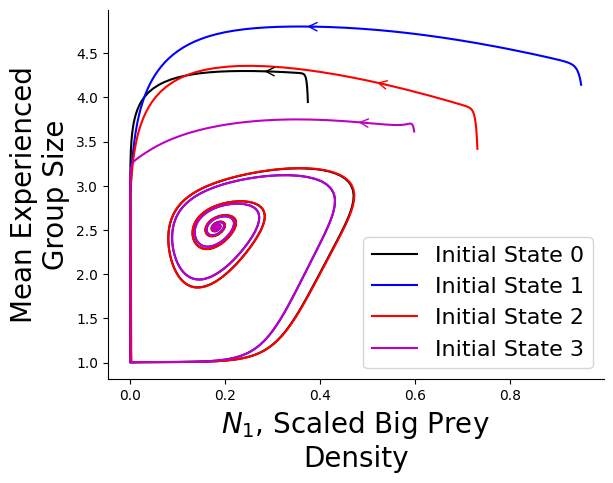

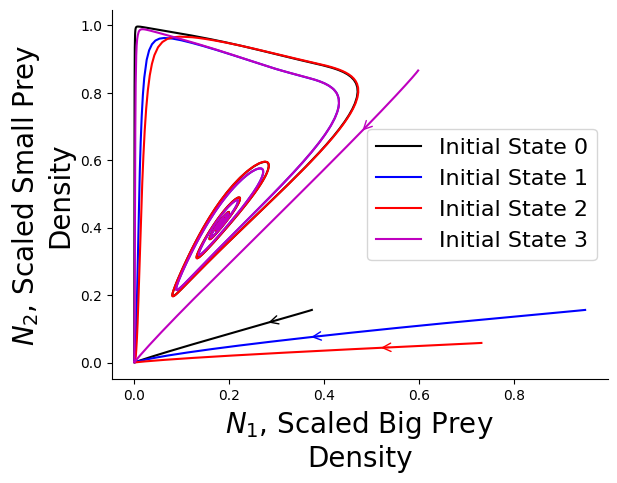

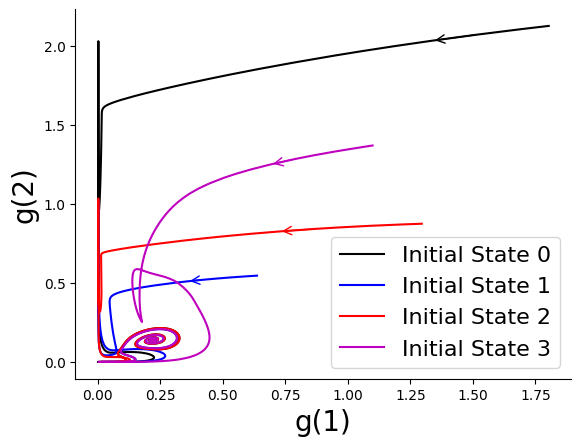

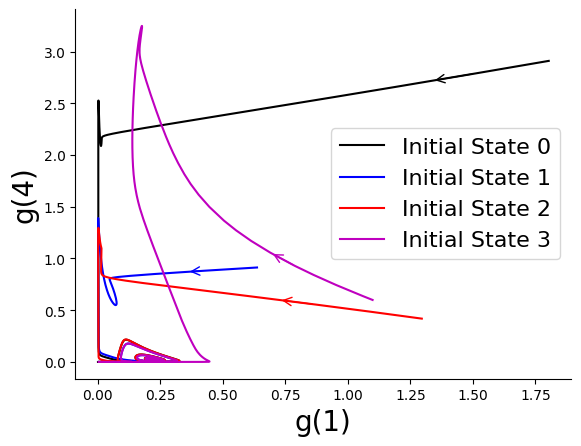

In [103]:
params = params_base.copy()
params['β1'] = 9
initial_points = get_initial_points(4,**params)
make_plots(initial_points, params, t_f =1000, start_inds = [50,50,5,5], grp_size2 = 4)

In [45]:
colors_x.pop()

'm'

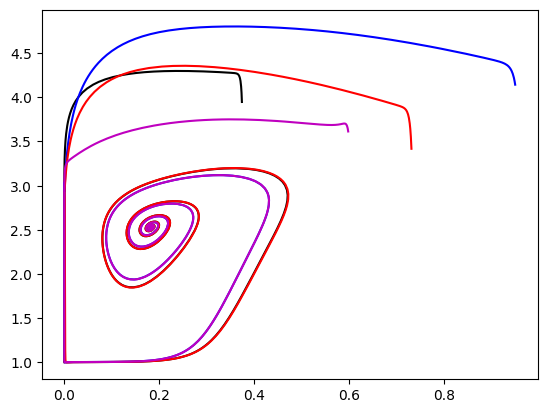

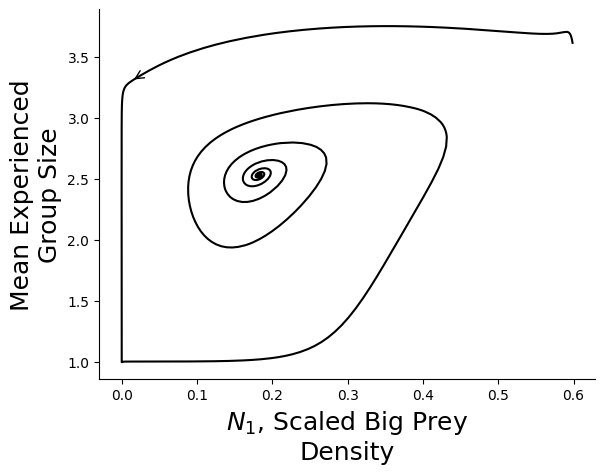

In [65]:
params = params_base.copy()
params['β1'] = 9
initial_points = get_initial_points(4,**params)
fig, ax = plt.subplots(1,1)
for i, init_state1 in enumerate(initial_points):
    t_f = 1000
    out2 = solve_ivp(full_model, [0, t_f], init_state1, method="LSODA",
                args=(True,params))
    T, N1, N2, P, g_of_x_vec, mean_x = get_results(out2, x_max)
    l = ax.plot(N1,mean_x,colors_x[i])
    
fig, ax = plot_x_vs_y(N1,mean_x,N1lab,mean_x_lab,[90])

In [30]:
get_equilibrium(params, N1_0 = init_state1[0], N2_0 = init_state1[1], g_of_x_vec = init_state1[2:]).x

array([7.57554229e-01, 5.25372891e-01, 3.76141776e-01, 8.70385931e-02,
       3.54500523e-02, 9.72974613e-04, 4.08693867e-06])

In [34]:
print(str(N1[-1]) + ', ' + str(N2[-1]) +', ' + str(g_of_x_vec[0][-1]))

0.757554229543684, 0.5253728908760685, 0.3761417766578857


In [28]:
mean_x[-1]

np.float64(1.6034006451833236)

In [24]:
params['β1']

2

In [9]:
initial_points

array([[0.37454012, 0.15599452, 0.06175348, 2.90972956, 2.49732792,
        0.63701733, 0.5454749 ],
       [0.95071431, 0.05808361, 0.55021353, 0.91272673, 1.57426929,
        1.29583506, 0.87368742],
       [0.73199394, 0.86617615, 1.83555868, 0.41848158, 0.87643395,
        1.09908553, 1.36820995],
       [0.59865848, 0.60111501, 2.35552788, 0.59902135, 1.54270332,
        1.77724371, 0.13935124],
       [0.15601864, 0.70807258, 1.82263456, 0.51157237, 0.19515478,
        2.84665661, 2.8968961 ]])

In [4]:
g_of_x_vec = np.zeros(x_max)
x=1 # everyone initially solitary
g_of_x_vec[x-1] = P_reg/x
initialstate = [N1_reg, N2_reg, *g_of_x_vec];

NameError: name 'P_reg' is not defined